In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

In [2]:
/bin/rm -rf 315,990
download_chandra_obsid 315,990 --exclude vvref,osol,eph1,evt2


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      213 Mb  ####################            3 s  80458.2 kb/s
  asol     fits       19 Mb  ####################          < 1 s  90157.8 kb/s
  aoff     fits        8 Mb  ####################          < 1 s  11516.9 kb/s
  mtl      fits        3 Mb  ####################          < 1 s  33066.3 kb/s
  stat     fits        2 Mb  ####################          < 1 s  54423.3 kb/s
  aqual    fits        1 Mb  ####################          < 1 s  35557.2 kb/s
  cntr_img jpg       656 Kb  ####################          < 1 s  23507.4 kb/s
  bias     fits      500 Kb  ####################          < 1 s  18270.0 kb/s
  bias     fits      448 Kb  ####################          < 1 s  20236.3 kb/s
  bias     fits      441 Kb  ####################          < 1 s  24707.9 kb/s
  bias     fits      441 Kb  ####################    

In [3]:
/bin/rm -rf repro
chandra_repro 315,990 ./repro 


Running chandra_repro
version: 14 September 2021



Processing input directory '/proj/sds/Staff/kjg/Threads/eff2evt/315'

Applying boresight update to aspect solution file
Resetting afterglow status bits in evt1.fits file...

Running the destreak tool on the evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.14): WARNING: The ra_targ, dec_targ, or roll_nom specified by /proj/sds/Staff/kjg/Threads/eff2evt/repro/pcadf00315_repro_obs.par does not match the values in the event file- using the obs.par values.
# acis_process_events (CIAO 4.14): WARNING: problem reading ctifile, cti adjustment will not be applied. Changing apply_cti=yes to apply_cti=no.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/k

In [4]:
dmcopy "repro/acisf00315_repro_evt2.fits[energy=300:7000][ccd_id=7]" acis_315_filt7.fits clob+

In [5]:
eff2evt acis_315_filt7.fits acis_315_flux7.fits clob+

In [6]:
dmlist acis_315_flux7.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block EVENTS
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   time                 s            Real8          60413209.3141160011: 60489714.2918820009 -          S/C TT corresponding to mid-exposure
   2   expno                             Int4           0:2147483647         -          Exposure number of CCD frame containing event
   3   ccd_id                            Int2           0:9                  -          CCD reporting event
   4   node_id                           Int2           0:3                  -          CCD serial readout amplifier node
   5   chip(chipx,chipy)    pixel        Int2           1:1024               -          Chip coords
   6   tdet(tdetx,tdety)    pixel        Int2           1:8192               9999       ACIS tiled detector coordin

## Photon flux

In [7]:
dmtcalc acis_315_flux7.fits acis_315_pflux7.fits \
      expression="pflux=1/(QE*EA*DACORR*LIVETIME)" cl+

In [8]:
dmlist "acis_315_pflux7.fits[cols pflux]" data row=1:20

 
--------------------------------------------------------------------------------
Data for Table Block EVENTS
--------------------------------------------------------------------------------
 
ROW    PFLUX
 
     1      3.742128492E-08
     2      2.236818852E-08
     3      3.076114553E-08
     4      2.295607408E-08
     5      1.163548589E-07
     6      5.075101892E-08
     7       2.03346769E-08
     8      1.106968786E-07
     9      3.507076917E-08
    10      3.597280183E-08
    11      1.023157362E-07
    12      2.119496877E-08
    13      4.105809701E-08
    14      3.613163741E-08
    15      2.384555356E-08
    16      8.333711719E-08
    17      2.386037771E-08
    18      7.086063515E-08
    19      2.520680996E-08
    20      2.371352088E-08


## HRC Data

In [9]:
eff2evt repro/hrcf00990_repro_evt2.fits hrc_990_flux.fits energy=1.1 clob+

In [10]:
dmlist hrc_990_flux.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block EVENTS
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   time                 s            Real8          97387353.0922120064: 97390363.0048280060 Time tag (TT)
   2   crsv                              Int2           0:191                Coarse position V axis
   3   crsu                              Int2           0:15                 Coarse position U axis
   4   amp_sf                            Int2           0:3                  Amplitude scale factor
   5   av1                               Int2           0:4095               V axis ADC 1
   6   av2                               Int2           0:4095               V axis ADC 2
   7   av3                               Int2           0:4095               V axis ADC 3
   8   au1                               Int2           0:4

### Photon Flux

In [11]:
dmtcalc hrc_990_flux.fits hrc_990_pflux.fits \
  expression="pflux=1/(QE*EA*LIVETIME)" cl+

In [12]:
dmlist "hrc_990_pflux.fits[cols pflux]" data row=1:10 

 
--------------------------------------------------------------------------------
Data for Table Block EVENTS
--------------------------------------------------------------------------------
 
ROW    PFLUX
 
     1      2.278334519E-06
     2      2.280694792E-06
     3       2.28029229E-06
     4      2.279849252E-06
     5      2.278984348E-06
     6      2.316264369E-06
     7      2.280378016E-06
     8      3.840318905E-06
     9      2.290962966E-06
    10      2.278602432E-06


## Examine Output

In [14]:
dmstat "acis_315_flux7.fits[sky=circle(4191.5,3857.5,158.74268)][cols flux]"

FLUX[ergs/cm**2/s]
    min:	3.0131575825e-17 	      @:	6681 
    max:	1.6349624765e-15 	      @:	8244 
   mean:	8.4192410305e-17 
  sigma:	1.50313965e-16 
    sum:	2.5758667933e-12 
   good:	30595 
   null:	0 



In [15]:
dmstat "acis_315_flux7.fits[sky=circle(4191.5,3857.5,158.74268)][cols flux]" \
      verbose=0

In [16]:
pget dmstat out_sum

2.5758667933e-12


In [17]:
pget dmstat out_max

1.6349624765e-15


### Create image

In [18]:
dmcopy "acis_315_flux7.fits[sky=circle(4191.5,3857.5,158.74268)][bin x,y;flux]" acis_315_flux7.img clob+

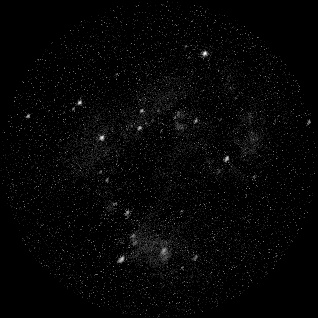

In [19]:
dmimg2jpg infile=acis_315_flux7.img outfile=acis_315_flux7.jpg scalefun=log mode=h clob+
display < acis_315_flux7.jpg

In [20]:
dmstat acis_315_flux7.img cen-

EVENTS_IMAGE[ergs/cm**2/s]
    min:	0 	      @:	( 4179.25732 3699.25732 )
    max:	4.8260830418e-14 	      @:	( 4238.25732 3963.25732 )
   mean:	3.2537038141e-17 
  sigma:	3.9887514698e-16 
    sum:	2.575469254e-12 
   good:	79155 
   null:	21969 


In [21]:
dmstat acis_315_flux7.img cen- verbose=0

In [22]:
pget dmstat out_sum

2.575469254e-12


In [23]:
pget dmstat out_max

4.8260830418e-14


# Cleanup


In [24]:
/bin/rm -rf 315 990 repro
